# Проект исследование в области образования в мире.

**Цель исследования**
Провести исследование в области образования: понять, как расходы на образование и политика в области образования влияют на грамотность, охват школьным образованием и общие результаты обучения. Для составления рекомендаций в законотворческой деятельности: оказание помощи правительствам и организациям в принятии решений, основанных на данных, относительно образовательных реформ и финансирования.

**Ход исследования:**
1. [Выгрузим и изучим данные.](#1)
2. [Проведем предобработку:](#2)
-  [Найдем в данных пропуски и примем решение о их заполнении или удалении](#2.1)
- [Выявим и удалим дубликаты](#2.2)
- [Определим тип данных, при необходимости изменим](#2.3)
3. [Проведем исследовательский анализ:](#3)
- [Изучим содержание каждого столбца](#3.1)
- [Очистим данные от выбросов при необходимости](#3.2)
- [Выясним, как государственные расходы на образование коррелируют с уровнем грамотности и охватом школами в разных регионах](#3.3)
- [Определим каковы тенденции в соотношении числа учеников и учителей с течением времени и как они влияют на результаты образования](#3.4)
- [Исследуем насколько различаются показатели образования в странах с низким и высоким уровнем доходов](#3.5)
- [Постараемся выявить в каких странах будет обеспечено всеобщее начальное образование, исходя из текущих тенденций](#3.6)
4. [Сделаем общий вывод и дадим рекомендации относительно образовательных реформ и финансирования.](#4)


**Описание данных**
Набор данных *world_education_data.csv* основан на датасете World Education Dataset, опубликованном на платформе для соревнований по исследованию данных Kaggle. Источник данных образовательная базы данных Всемирного банка, которая предоставляет надежную, обновленную статистику о прогрессе в области образования во всем мире.  Включает в себя следующие ключевые показатели, собранные по более чем 200 странам:
- country	страна
- country_code код страны ISO
- year год, за который представлены данные
- gov_exp_pct_gdp государственные расходы на образование в процентах от ВВП
- lit_rate_adult_pct уровень грамотности взрослых (в возрасте 15 лет и старше) в процентах от общей численности населения
- pri_comp_rate_pct показатель завершения начальной школы в процентах от соответствующей возрастной группы
- pupil_teacher_primary соотношение числа учеников и учителей на уровне начального образования
- pupil_teacher_secondary соотношение учеников и учителей на уровне среднего образования
- school_enrol_primary_pct показатель охвата начальным образованием в процентах от численности населения
-school_enrol_secondary_pct показатель охвата средним образованием в процентах от численности населения
- school_enrol_tertiary_pct показатель охвата высшим образованием в процентах от численности населения

Таблица *region.xls* с распределением кодов стран по регионам, находится в свободном доступе:
- country_code код страны ISO
- region географический регион, к котору относится страна

Таблица *income_file.xlsv* с расперделение стран по уровнем дохода стран.Источник данных образовательная базы данных Всемирного банка :

- **L (Low income)** – Низкий доход (меньше $1,135 на душу населения)

- **LM (Lower middle income)** – Доход ниже среднего (от $1,136 до $4,465)
- **UM (Upper middle income)** – Доход выше среднего (от $4,466 до $13,845)
- **H (High income)** – Высокий доход (больше $13,846)

- country_code код страны ISO
- year год наблюдений
- income уровень дохода страны





## 1.Выгрузим и изучим данные.
<a name="1"></a>

In [121]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [122]:
# Установка стиля
sns.set(style="whitegrid")

# Установка палет
sns.set(palette="Dark2")

In [123]:
data = pd.read_csv('world-education-data.csv')

In [124]:
data.head(30)

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.471510,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.078050,1.38107
5,Afghanistan,AFG,2004,NaN,NaN,NaN,NaN,NaN,106.252663,19.263140,1.38966
6,Afghanistan,AFG,2005,NaN,NaN,NaN,NaN,NaN,100.229691,20.311960,NaN
7,Afghanistan,AFG,2006,4.684761,NaN,NaN,42.32602,NaN,103.932243,29.691351,NaN
8,Afghanistan,AFG,2007,4.174895,NaN,NaN,42.77030,31.56236,101.086456,29.089170,NaN
9,Afghanistan,AFG,2008,4.383672,NaN,NaN,43.72982,NaN,103.413963,39.090031,NaN


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5892 non-null   object 
 1   country_code                5892 non-null   object 
 2   year                        5892 non-null   int64  
 3   gov_exp_pct_gdp             4499 non-null   float64
 4   lit_rate_adult_pct          1877 non-null   float64
 5   pri_comp_rate_pct           4440 non-null   float64
 6   pupil_teacher_primary       3676 non-null   float64
 7   pupil_teacher_secondary     3017 non-null   float64
 8   school_enrol_primary_pct    5352 non-null   float64
 9   school_enrol_secondary_pct  4745 non-null   float64
 10  school_enrol_tertiary_pct   4392 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 506.5+ KB


*Изучили данные.Обнаружили, что в таблице всего 5892 зависи. Названия столбцов соответствуют принятому стилю и понятны. В таблице имеются пропуски значений. Данные представлены типа object, целочисленные здесь значатся года наблюдений и данные с плавающей запятой.*

## 2. Проведем предобработку:
<a name="2"></a>

**Найдем в данных пропуски и примем решение о их заполнении или удалении.**
<a name="2.1"></a>

In [126]:
(data.isna().sum() / len(data)).round(4) * 100

,0
country,0.00
country_code,0.00
year,0.00
gov_exp_pct_gdp,23.64
lit_rate_adult_pct,68.14
pri_comp_rate_pct,24.64
pupil_teacher_primary,37.61
pupil_teacher_secondary,48.79
school_enrol_primary_pct,9.16
school_enrol_secondary_pct,19.47


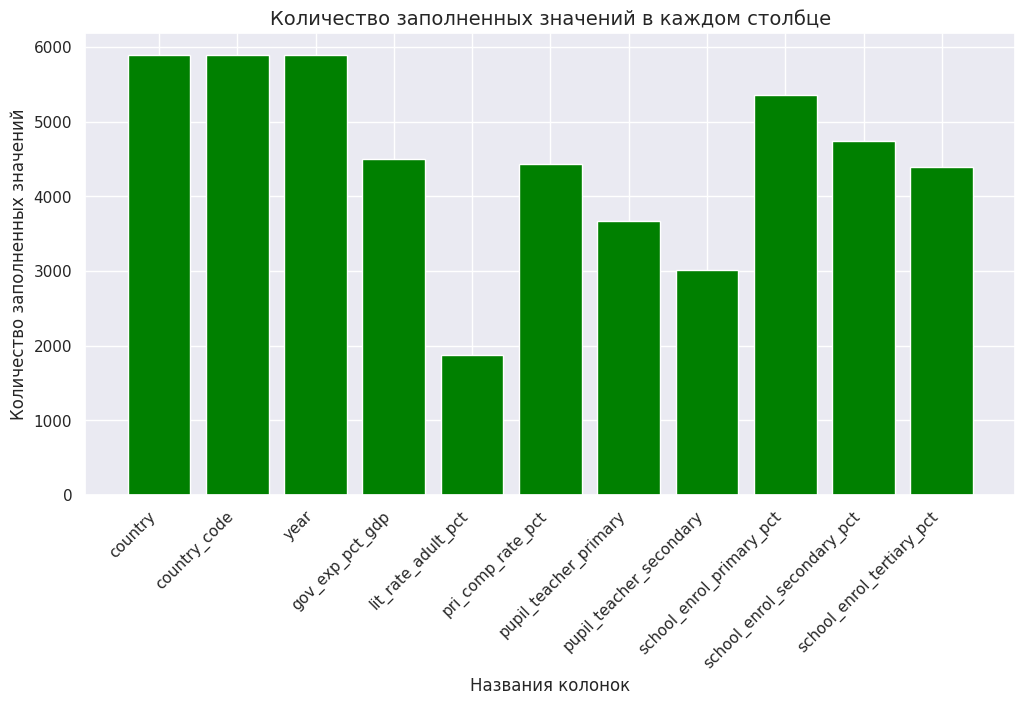

In [127]:
# подсчёт количества ненулевых значений в каждом столбце
column_counts = data.count()

# построение гистограммы
plt.figure(figsize=(12, 6))  # Размер графика
plt.bar(column_counts.index, column_counts.values, color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Количество заполненных значений в каждом столбце', fontsize=14)
plt.xlabel('Названия колонок', fontsize=12)
plt.ylabel('Количество заполненных значений', fontsize=12)
plt.show()

*В столбцах обнаружено много пропусков. Больше всего пропущенных значений в столбце lit_rate_adult_pct об уровне грамотности взрослых. Так как данные основаны на фактическом подсчете граждан с разным уровнем образования в результате опросов населения, то заменить эти данные не представляется возможным. Удалять строки с пропусками тоже небудем так как это повлияет на результаты нашего исследования.*

**Выявим и удалим дубликаты.**
<a name="2.2"></a>

In [128]:
data.duplicated().sum()

0

*Явных дубликатов не обнаружено.*

**Определим тип данных, при необходимости изменим.**
<a name="2.3"></a>

In [129]:
data.dtypes

,0
country,object
country_code,object
year,int64
gov_exp_pct_gdp,float64
lit_rate_adult_pct,float64
pri_comp_rate_pct,float64
pupil_teacher_primary,float64
pupil_teacher_secondary,float64
school_enrol_primary_pct,float64
school_enrol_secondary_pct,float64


*Название страны и код указаны с типом object, год статистики имеет целочисленный тип. Остальные столбцы с долями населения числовой тип с плавающей запятой. Менять типы не будем, для исследования они подходят.*

## 3. Проведем исследовательский анализ.
<a name="3"></a>

**Изучим содержание каждого столбца**
<a name="3.1"></a>

In [130]:
# изучим содержание столбца country
data['country'].unique()


array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic',
       'Early

In [131]:
data['country'].value_counts()

,count
country,
Latin America & the Caribbean (IDA & IBRD countries),25
"Gambia, The",25
Tajikistan,25
Kuwait,25
Kyrgyz Republic,25
...,...
"Korea, Dem. People's Rep.",5
Somalia,4
New Caledonia,1


*Всего представлено 256 стран. По некоторым из них имеются данные всего по одному году статистики. Например, New Caledonia.*

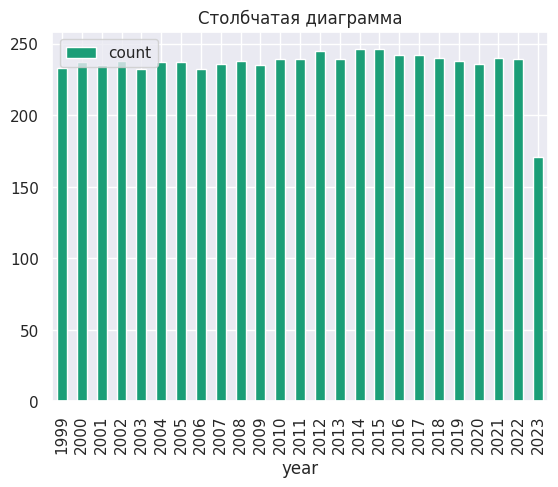

In [132]:
# изучим содержание столбца year
data_year = data.groupby('year')['country'].count().reset_index()
data_year.columns = ['year', 'count']
data_year.plot.bar(x='year', y='count', title='Столбчатая диаграмма')
plt.show()


*Данные представлены с 1999 года по 2023, количество статистических данных за каждый год примерно одинаково около 230 исследований. За 2023 год данных меньше, скорее всего статистика взята не за полный год и охватила не все страны.*

In [133]:
data.head()

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


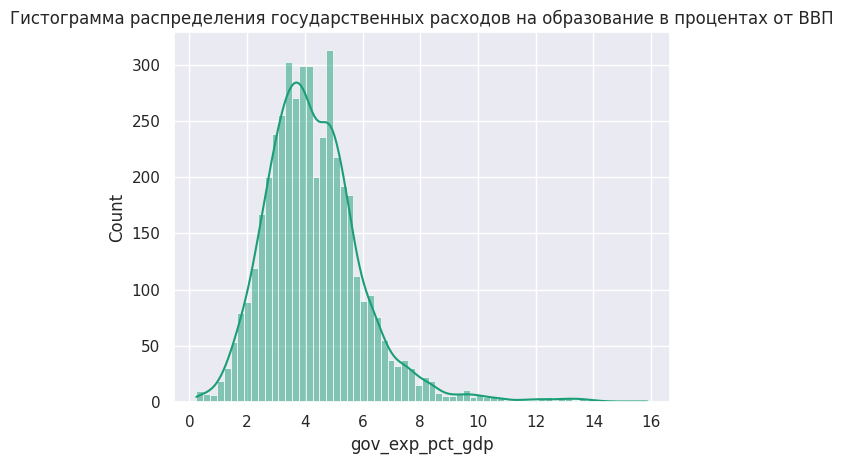

In [134]:
# изучим содержание столбца gov_exp_pct_gdp
sns.histplot(data['gov_exp_pct_gdp'], kde=True)
plt.title("Гистограмма распределения государственных расходов на образование в процентах от ВВП")
plt.show()



*Государства чаще всего тратят от 2 до 4 процентов от ВВП на образование. Есть редко встречающиеся значения от 10 до 16 процентов.*

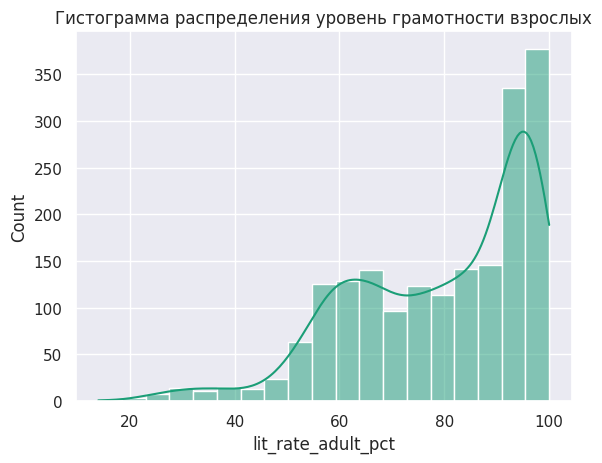

In [135]:
# изучим содержание столбца lit_rate_adult_pct
sns.histplot(data['lit_rate_adult_pct'], kde=True)
plt.title("Гистограмма распределения уровень грамотности взрослых")
plt.show()

*В процентном соотношении от общего числа взрослых уровень образования варьируется от 20 до 100 процентов. Чаще всего население умеет читать и писать.*

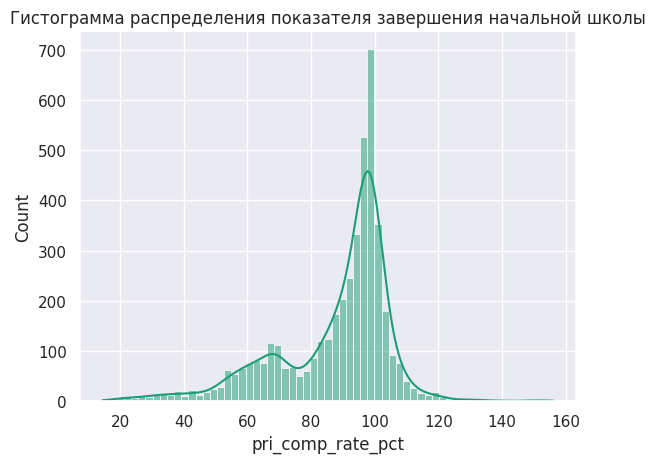

In [136]:
# изучим содержание столбца pri_comp_rate_pct
sns.histplot(data['pri_comp_rate_pct'], kde=True)
plt.title("Гистограмма распределения показателя завершения начальной школы")
plt.show()

*Из графика мы видим, показатель завершения начальной школы имеет значения от 20 до 120 для стран, чаще всего показательпринимает значение 100%, это означает, что все учащиеся завершили начальное образование в соответствующей возрасной группе. Превышение 100% для ряда стран может означать следующее:*
- Задержки в обучении – если дети старшего возраста еще учатся в этом уровне образования (например, остались на второй год или позже начали школу).
- Ранний доступ к образованию – если дети младшего возраста зачислены в учебное заведение раньше стандартного возраста.
- Миграция – если в стране много иностранных студентов, которые не входят в официальную возрастную когорту, но числятся в учебных заведениях.

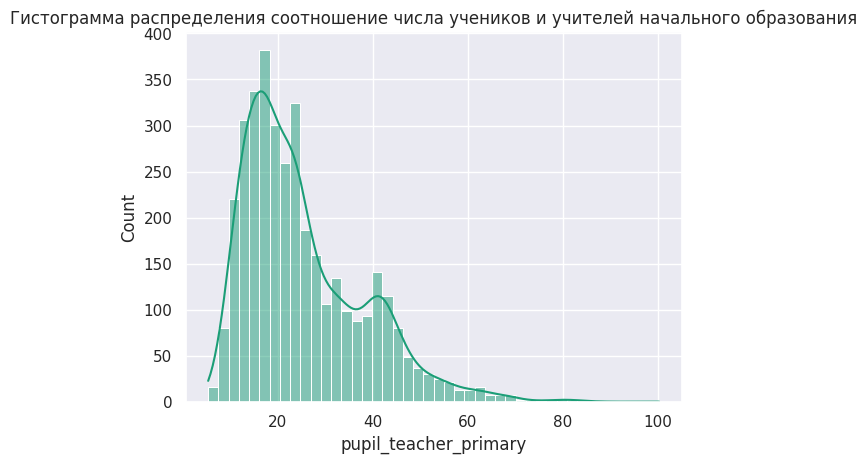

In [137]:
# изучим содержание столбца pupil_teacher_primary
sns.histplot(data['pupil_teacher_primary'], kde=True)
plt.title("Гистограмма распределения соотношение числа учеников и учителей начального образования")
plt.show()

*Количество учеников на одного учителя варьируется от 5 до 80, чаще всего это 20 учеников.*

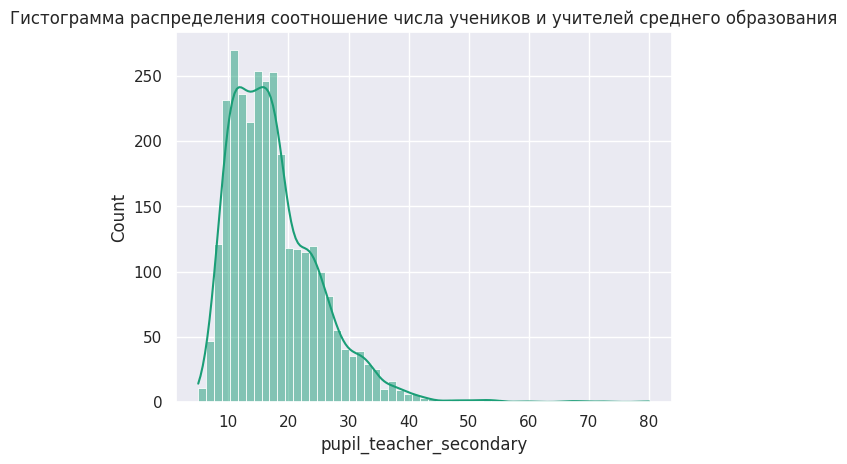

In [138]:
# изучим содержание столбца pupil_teacher_secondary
sns.histplot(data['pupil_teacher_secondary'], kde=True)
plt.title("Гистограмма распределения соотношение числа учеников и учителей среднего образования")
plt.show()

*Количество учеников на одного учителя в среднем образовании распределено от 5 до 45, чаще всего 10-20 учеников.*

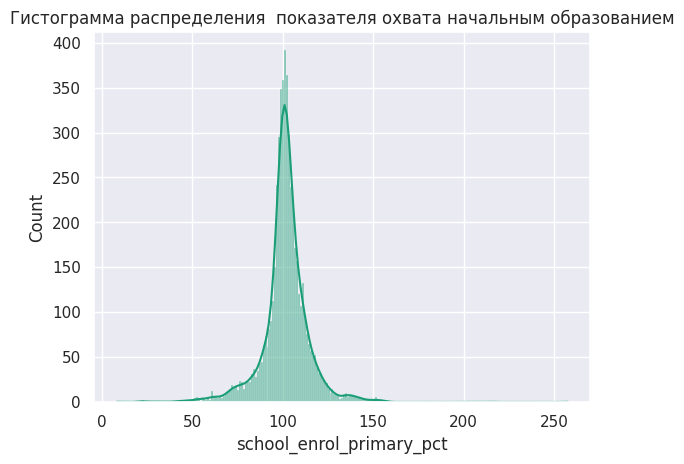

In [139]:
# изучим содержание столбца school_enrol_primary_pct
sns.histplot(data['school_enrol_primary_pct'], kde=True)
plt.title("Гистограмма распределения  показателя охвата начальным образованием")
plt.show()

*Чаще всего население получило начальное образование в 100%. Но для некоторых стран этот уровень гораздо ниже и достигает менее 50%. Показатель выше 100% может означать:*
- Запись детей не по возрасту (задержка или опережение)
- Приток учащихся из других стран



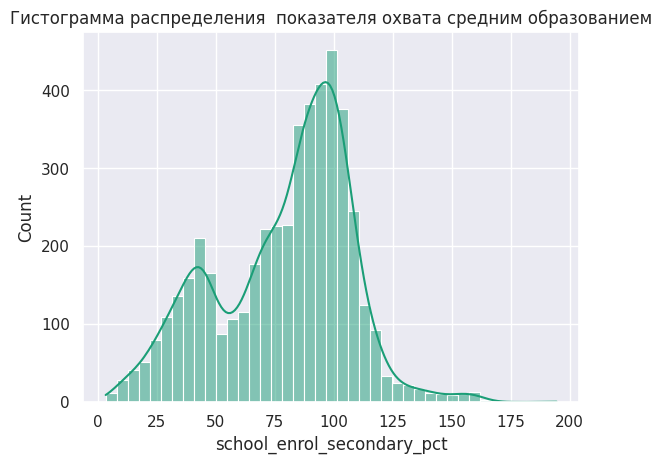

In [140]:
# изучим содержание столбца school_enrol_secondary_pct
sns.histplot(data['school_enrol_secondary_pct'], kde=True)
plt.title("Гистограмма распределения  показателя охвата средним образованием")
plt.show()

*Среднее образования в большенстве стран получило 100% населения в соответствующей возрастной группе. Уровень выше 100% может означать:*

- Запись детей не по возрасту (задержка или опережение)
- Приток учащихся из других стран



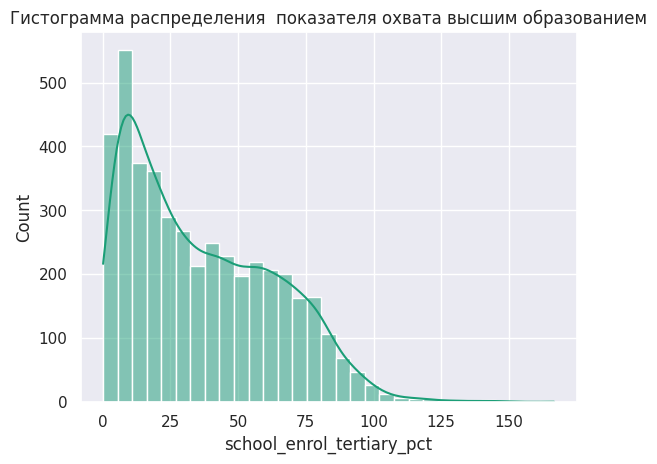

In [141]:
# изучим содержание столбца school_enrol_tertiary_pct
sns.histplot(data['school_enrol_tertiary_pct'], kde=True)
plt.title("Гистограмма распределения  показателя охвата высшим образованием")
plt.show()

*Высшее же образование чаще всего у 10% населения.*

**Очистим данные от выбросов при необходимости.**
<a name="3.2"></a>

*Не будем считать выбросами значения за пределами наиболее частых значений, так как они могут представлять ценность для нашего исследования.*

**Выясним, как государственные расходы на образование коррелируют с уровнем грамотности и охватом школами в разных регионах.**
<a name="3.3"></a>

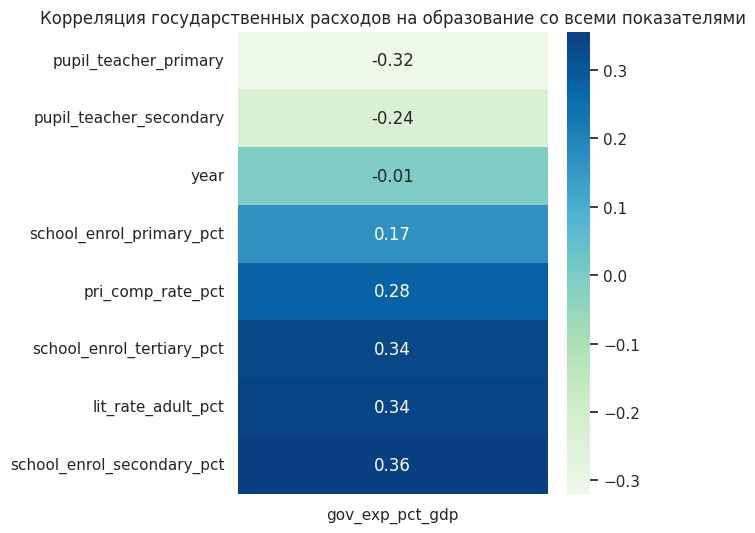

In [142]:
# Строим матрицу корреляции
data_corr = data.corr(numeric_only=True)

# Строим тепловую карту
plt.figure(figsize=(5, 6))
sns.heatmap(data_corr[['gov_exp_pct_gdp']].drop('gov_exp_pct_gdp').sort_values('gov_exp_pct_gdp'), annot=True, cmap='GnBu', fmt=".2f", center=0)

plt.title("Корреляция государственных расходов на образование со всеми показателями")
plt.show()

*Прямая связь между государственными расходами на образование с показателями образования практически отсутствует.*

In [143]:
#добавим таблицу с разбивкой стран по регионам, чтобы наш график был информативен
region = pd.read_excel('region.xls')
region

,country_code,region
0,ABH,Asia
1,AUS,Australia and Oceania
2,AUT,Europe
3,AZE,Asia
4,ALB,Europe
...,...,...
243,ZAF,Africa
244,SGS,NaN
245,OST,Asia
246,JAM,North America


In [144]:
data = data.merge(region, on='country_code', how='left')
data = data.reset_index(drop=True)
data.head()

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct,region
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN,Asia
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN,Asia
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN,Asia
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN,Asia
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107,Asia


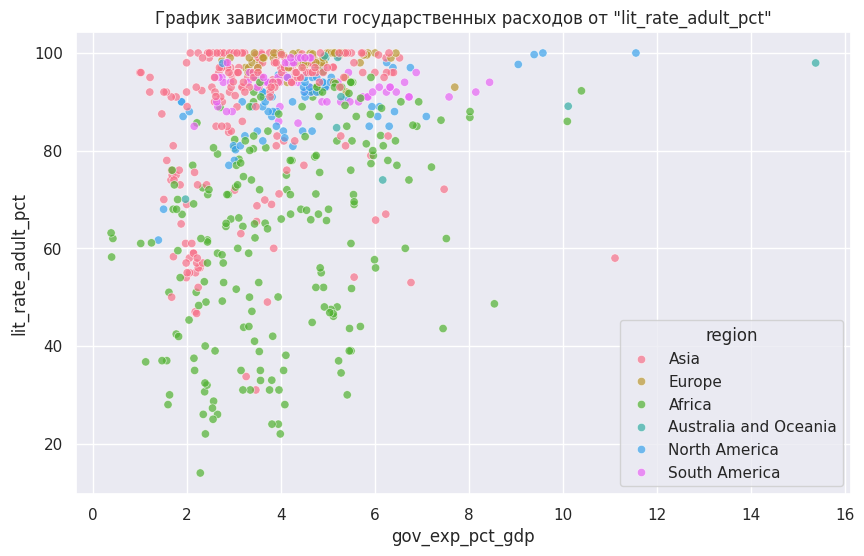

In [145]:
#создадим функцию для построения однотипных графиков рассеяния
def data_scatter(data, column, hue='region', figsize=(10, 6)):

    fig, ax = plt.subplots(figsize=figsize)

    sns.scatterplot(
        data=data,
        x='gov_exp_pct_gdp',
        y=column,
        hue=hue,
        alpha=0.7, palette='husl',
        ax=ax
    )

    ax.set_title(f'График зависимости государственных расходов от "{column}"')
    ax.set_ylabel(column)
    ax.set_xlabel('gov_exp_pct_gdp')

    plt.show()

#создадаим графиков рассеяния lit_rate_adult_pct
data_scatter(data, 'lit_rate_adult_pct')

*Судя по нашим данным есть слабая прямая зависимость расходов на образование от уровня грамотности населения. Уровень грамотности в странах Африки ниже, чем в остальных регионах. Самый высокий уровень образования в Европейских странах и Северной Америке.*

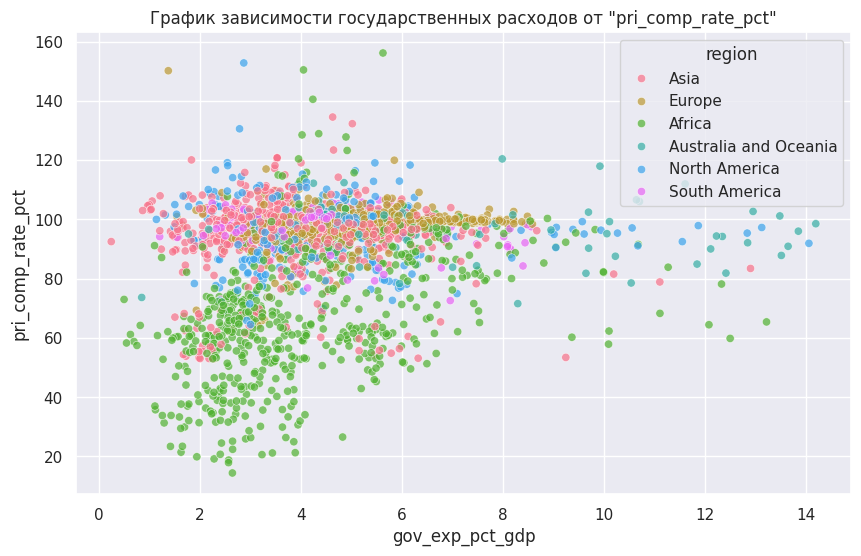

In [146]:
#создадаим графиков рассеяния lit_rate_adult_pct
data_scatter(data, 'pri_comp_rate_pct')

*Прямой зависимости расходов на образование и показателем завершения начальной школы населения практически нет. Но мы видим, что в странах Африки показатель завершения начальной школы значительно ниже остальных регионов.*

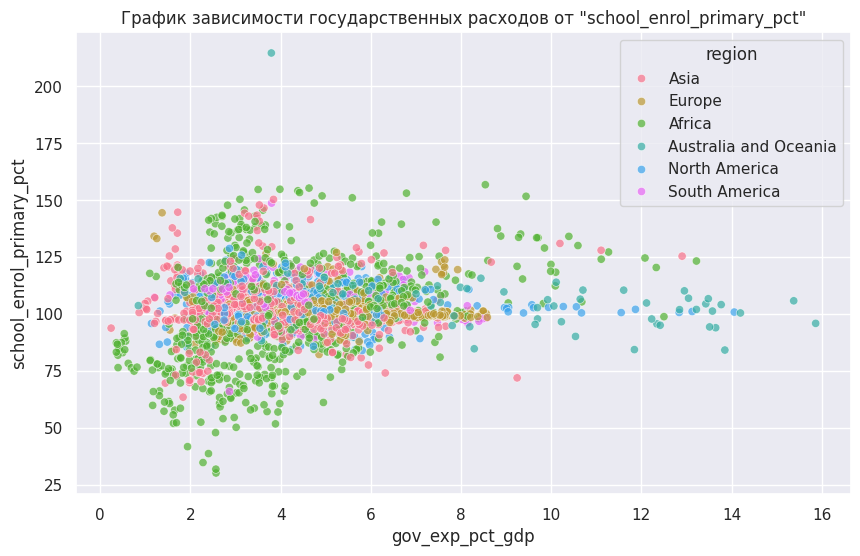

In [147]:
#создадаим графиков рассеяния lit_rate_adult_pct
data_scatter(data, 'school_enrol_primary_pct')

*Зависимости между государственными расходами на образование и охватом начальным образованием по регионам нет. По всем регионам наблюдается сосредоточение процента охвата начальным образованием на уровне 100. Но в Африке наблюдаются значительные отклонения в критически малое значение , а также за пределы 100%. Критически малый показатель может означать, что в некоторых странах Африки есть проблемы с доступом к образованию, нехватку школ, инфраструктурные или экономические трудности, которые мешают детям посещать школу. Слишком большие значения могут быть вызваны задержкой в обучении – если дети старшего возраста еще учатся в этом уровне образования.
Миграцией – если в стране много иностранных студентов, которые не входят в официальную возрастную когорту, но числятся в учебных заведениях, что может быть связано с нестабильной обстановкой в соседних странах.*

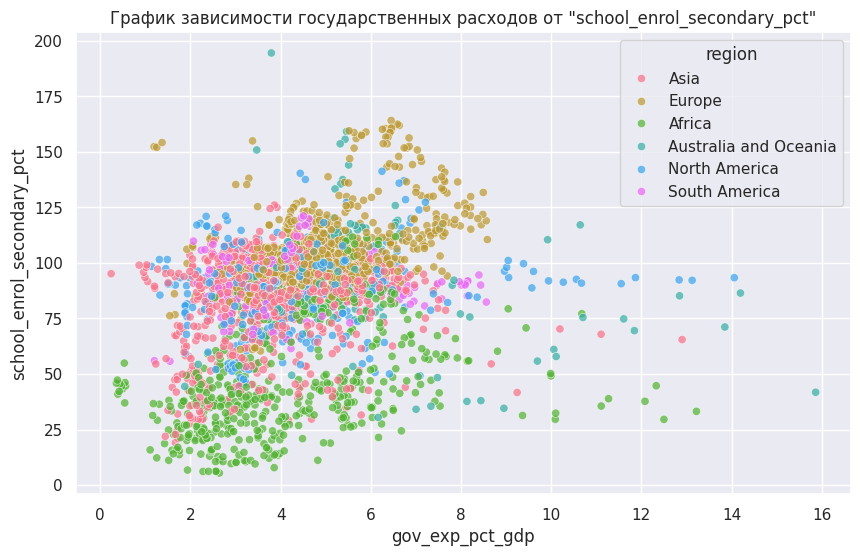

In [148]:
#создадаим графиков рассеяния lit_rate_adult_pct
data_scatter(data, 'school_enrol_secondary_pct')

*Зависимость между государственными расходами на образование и охватом средним образованием по регионам не слишком выдажена. Но мы наблюдаем отклонения от отметки 100% охвата. Для стран Африки, показатель охвата находится области от 10% до 75%, это может говорить о проблемах с доступом к образованию, нехватку школ, инфраструктурные или экономические трудности. Причем уровень для стран Африки стабильно ниже остальных стран вне зависимости от размера затрат на образование. Тогда как в Странах Европы наблюдается обратная тенденция, показатель охвата больше 100% при среднем уровне затрат на образование, что может говорить о миграции с целью образования в более престижных заведения.*

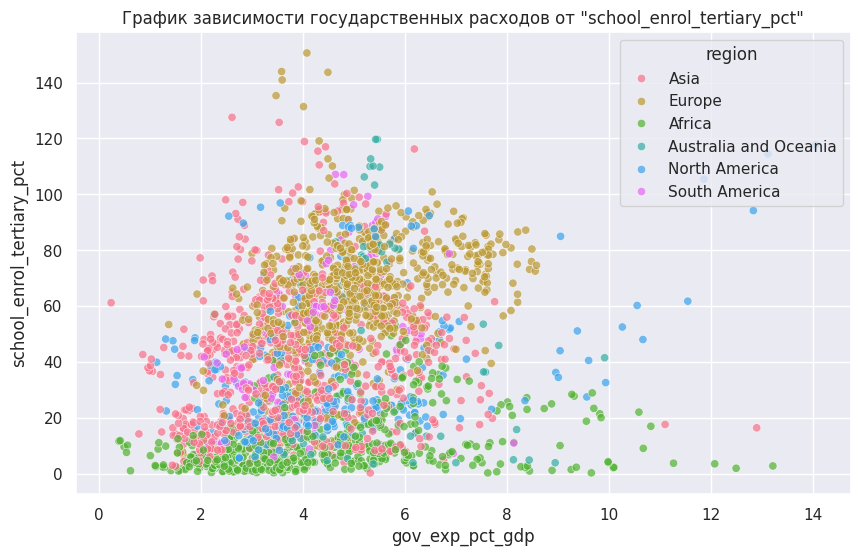

In [149]:
#создадаим графиков рассеяния lit_rate_adult_pct
data_scatter(data, 'school_enrol_tertiary_pct')

*Зависимость между государственными расходами на образование и охватом высшим образованием по регионам не слишком выдажена. В нашем исследовании выделяется регион Африка, там уровень охвата стабильно не превышает 20% населения в соотвтствующей возрасной группе. Что свидетельствует о проблемах с доступом к образованию, нехватку школ, инфраструктурные или экономические трудности. В странах Европы этот показатель первышает 100%, что может говорить о миграции с целью образования в более престижных заведения. В остальных регионах наблюдается разброс значений по странам от 10% до 100%.*

**Определим каковы тенденции в соотношении числа учеников и учителей с течением времени и как они влияют на результаты образования.**
<a name="3.4"></a>

In [150]:
# составим сводную таблицу по году,ирегиону и соотношению числа учеников и учителей
data_pivot_year = data.pivot_table(index = ['year','region'], values = ['pupil_teacher_primary','pupil_teacher_secondary'], aggfunc = 'mean').reset_index()
data_pivot_year

,year,region,pupil_teacher_primary,pupil_teacher_secondary
0,1999,Africa,42.245264,26.038676
1,1999,Asia,25.472137,19.556597
2,1999,Australia and Oceania,19.790730,17.675303
3,1999,Europe,17.468253,12.075228
4,1999,North America,22.703823,16.199076
...,...,...,...,...
118,2018,North America,17.119403,13.722234
119,2018,South America,19.228504,19.807135
120,2019,Africa,26.994860,21.002775
121,2019,Asia,18.479265,17.968315


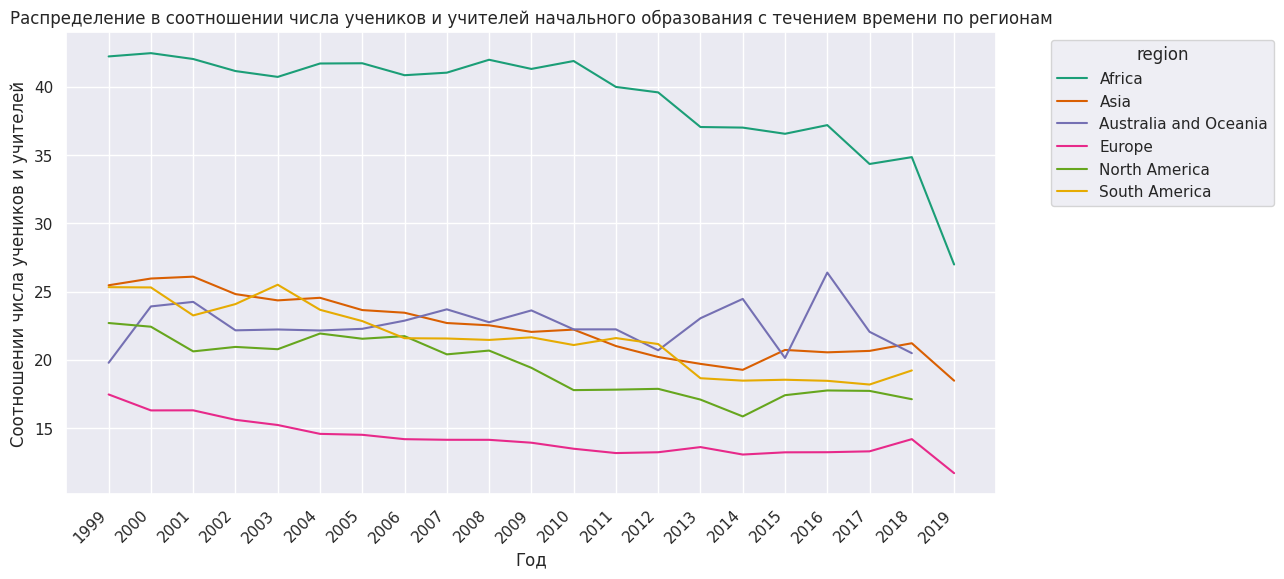

In [151]:
#  нарисуем линейный график с разбивкой по региону
data_pivot_year['year'] = data_pivot_year['year'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=data_pivot_year, x="year", y="pupil_teacher_primary", hue="region")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Год")
plt.ylabel("Соотношении числа учеников и учителей")
plt.title("Распределение в соотношении числа учеников и учителей начального образования с течением времени по регионам")
plt.legend(title="region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

*Наблюдается тенденция к снижению количества учеников на одного учителя начального образования во всех регионах. Однако можно выделить Европейский регион, там с начала исследования были самые низкие показатели и к концу исследования достигли значения меньше 10 человек. В Африке же в 1999 году наблюдалось значение более 40 учеников, в конце исследования в 2019 отметка сместилась к значению менее 30 учеников на одного учителя.*

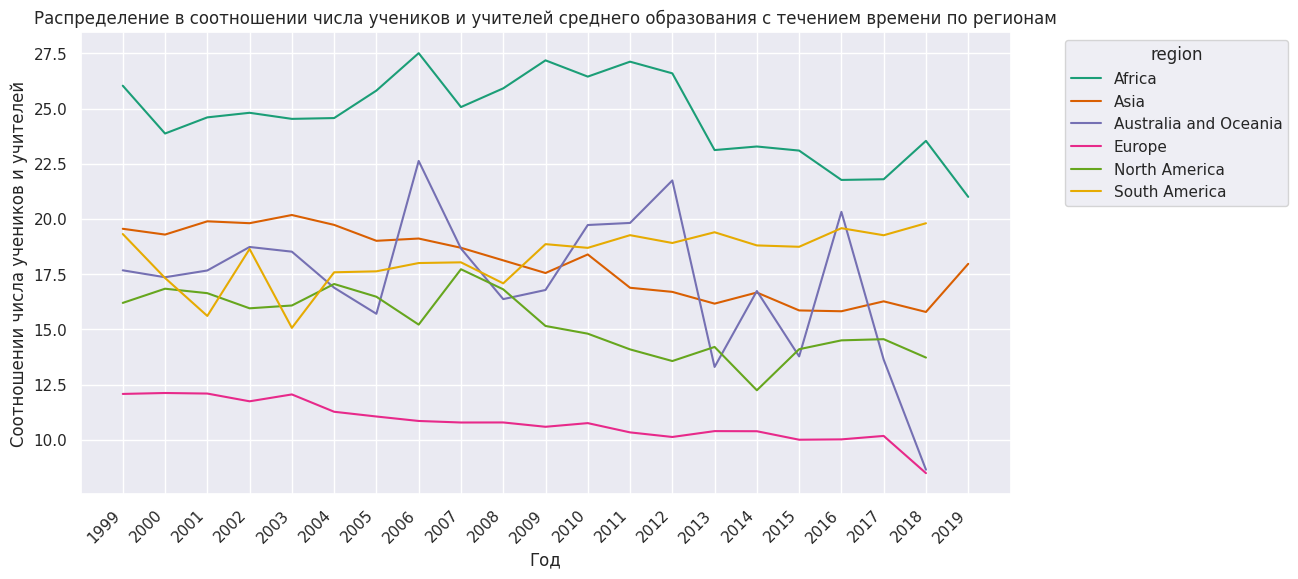

In [152]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data_pivot_year, x="year", y="pupil_teacher_secondary", hue="region")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Год")
plt.ylabel("Соотношении числа учеников и учителей")
plt.title("Распределение в соотношении числа учеников и учителей среднего образования с течением времени по регионам")
plt.legend(title="region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Наблюдается тенденция к снижению количества учеников на одного учителя среднего образования во всех регионах. Однако можно выделить Европейский регион, там с начала исследования были самые низкие показатели и к концу исследования достигли значения меньше 5 человек. В Африке же в 1999 году наблюдалось значение более 25 учеников, в конце исследования в 2019 отметка сместилась к значению менее 22 учеников на одного учителя.

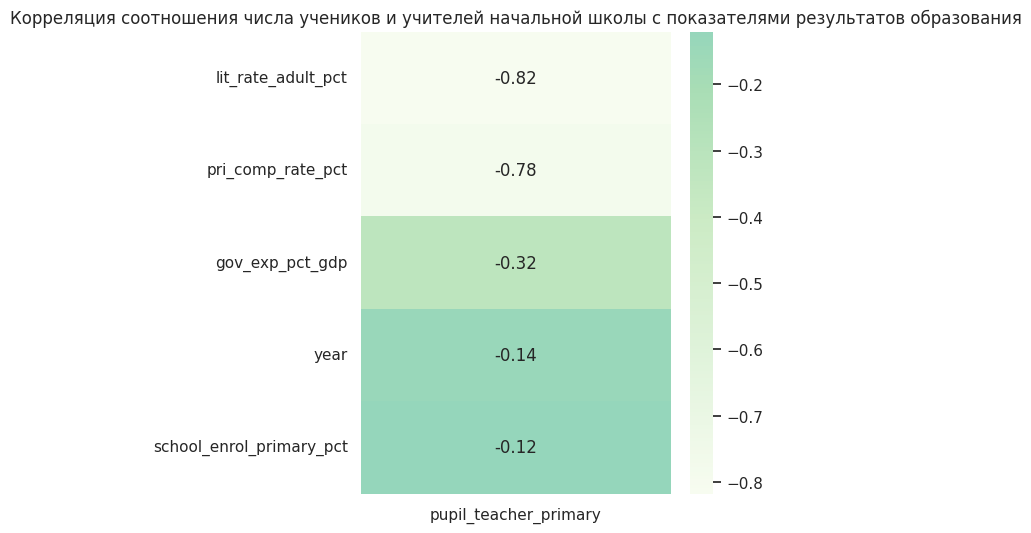

In [153]:
# Строим матрицу корреляции
data_corr = data.corr(numeric_only=True)

# Строим тепловую карту
plt.figure(figsize=(5, 6))
sns.heatmap(data_corr[['pupil_teacher_primary']].drop(['pupil_teacher_primary', 'pupil_teacher_secondary', 'school_enrol_tertiary_pct','school_enrol_secondary_pct']).sort_values('pupil_teacher_primary'), annot=True, cmap='GnBu', fmt=".2f", center=0)

plt.title("Корреляция соотношения числа учеников и учителей начальной школы с показателями результатов образования")
plt.show()

*Наблюдается довольно сильная обратная  зависимость соотношения числа учеников и учителей начальной школы от показателя завершения начальной школы(%), от общей грамотности взрослого населения. Чем меньше учеников начальной школы приходится на одного учителя, тем выше процент завершения начальной школы и общий уровень грамотности.*

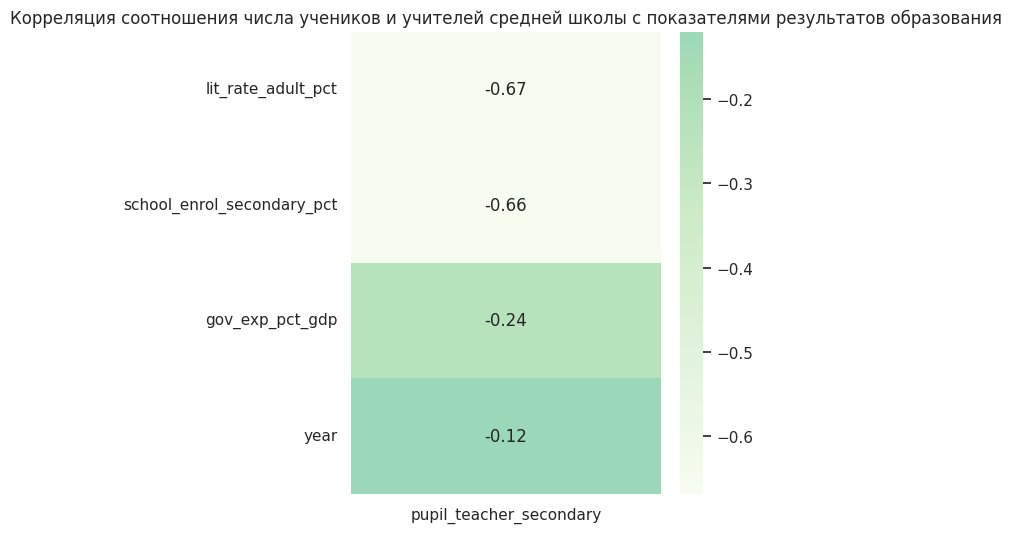

In [154]:
# Строим тепловую карту
plt.figure(figsize=(5, 6))
sns.heatmap(data_corr[['pupil_teacher_secondary']].drop(['pupil_teacher_secondary','pupil_teacher_primary', 'school_enrol_tertiary_pct','school_enrol_primary_pct', 'pri_comp_rate_pct']).sort_values('pupil_teacher_secondary'), annot=True, cmap='GnBu', fmt=".2f", center=0)

plt.title("Корреляция соотношения числа учеников и учителей средней школы с показателями результатов образования")
plt.show()

*Здесь мы видим такую закономерность, чем меньше учеников приходится на учителей средней школы, тем выше охват средним образованием граждан и выше уровень грамотности.*

**Исследуем насколько различаются показатели образования в странах с низким и высоким уровнем доходов.**
<a name="3.5"></a>

In [155]:
#добавим таблицу с разбивкой стран по уровням дохода
income = pd.read_excel('income_file.xlsx', index_col=0)
income

,country_code,year,income
0,AFG,1999,L
1,ALB,1999,LM
2,DZA,1999,LM
3,ASM,1999,UM
4,AND,1999,H
...,...,...,...
5009,VIR,2021,H
5010,PSE,2021,LM
5011,YEM,2021,L
5012,ZMB,2021,L


In [156]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5014 entries, 0 to 5013
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  5014 non-null   object
 1   year          5014 non-null   int64 
 2   income        5012 non-null   object
dtypes: int64(1), object(2)
memory usage: 156.7+ KB


*Проверили типы данных таблицы, для дальнейшей работы подходят.*

In [157]:
data = data.merge(income, on=['country_code', 'year'], how='left', suffixes=('_data', '_income'))
data.head()

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct,region,income
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN,Asia,L
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN,Asia,L
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN,Asia,L
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN,Asia,L
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107,Asia,L


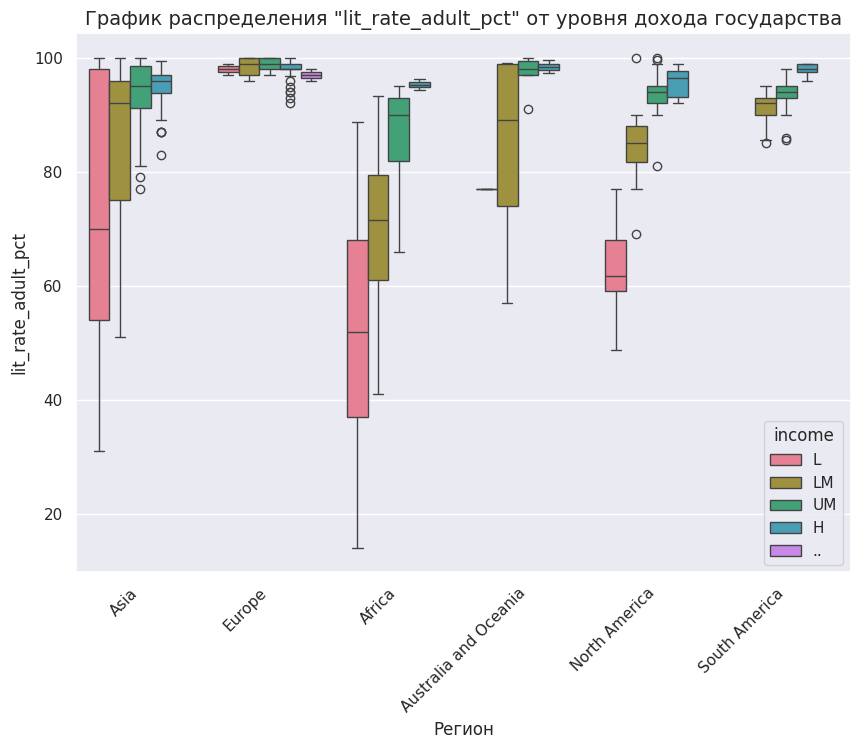

In [158]:
#создадим функцию для построения графиков распределения показателей образования по уровню дохода государства
def data_boxplot(data, column, hue='income', figsize=(10, 7)):
       # Создаем график
    fig, ax = plt.subplots(figsize=figsize)

    sns.boxplot(
        data=data,
        x='region',
        y=column,
        hue=hue,
        palette='husl',
        ax=ax
    )

    # Подписываем оси и заголовок
    ax.set_title(f'График распределения "{column}" от уровня дохода государства', fontsize=14)
    ax.set_ylabel(column)
    ax.set_xlabel('Регион')
    plt.xticks(rotation=45, ha='right')  # Поворот подписей регионов
    plt.show()

# Создаем график для "lit_rate_adult_pct"
data_boxplot(data, 'lit_rate_adult_pct')

*Из графика мы видим, что медианное значение уровня образования в регионах с более низким доходам государства стабильно ниже, чем с высоким.*

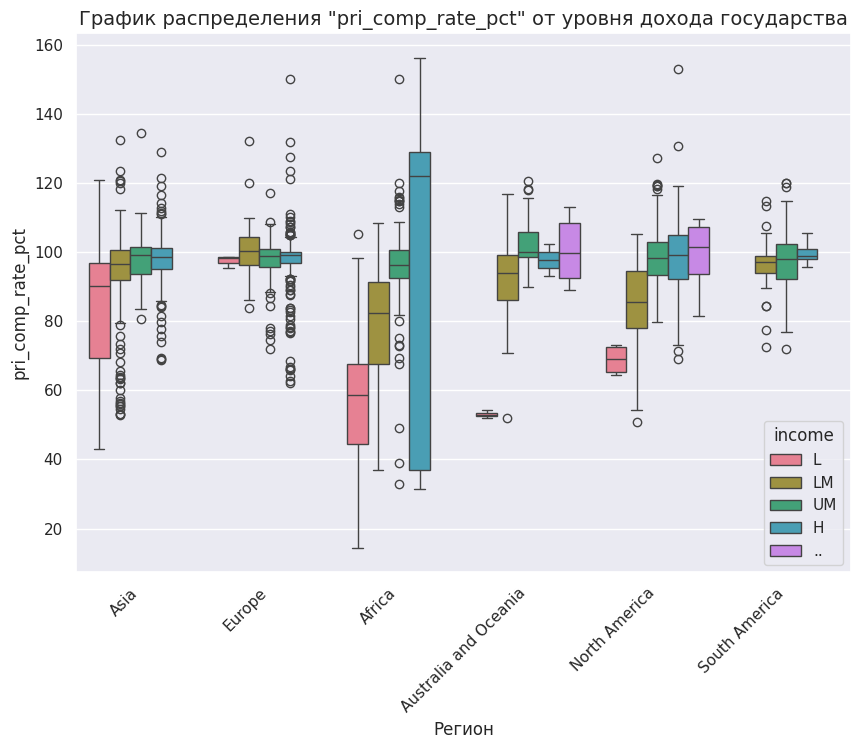

In [159]:
# Создаем график для "pri_comp_rate_pct"
data_boxplot(data, 'pri_comp_rate_pct')

*Уровень завершения начального образования в странах с низким доходом ниже во всех регионах. Но самые низкие показатели медианных зачений уровня в Африке в некоторых странах Северной Америки.*

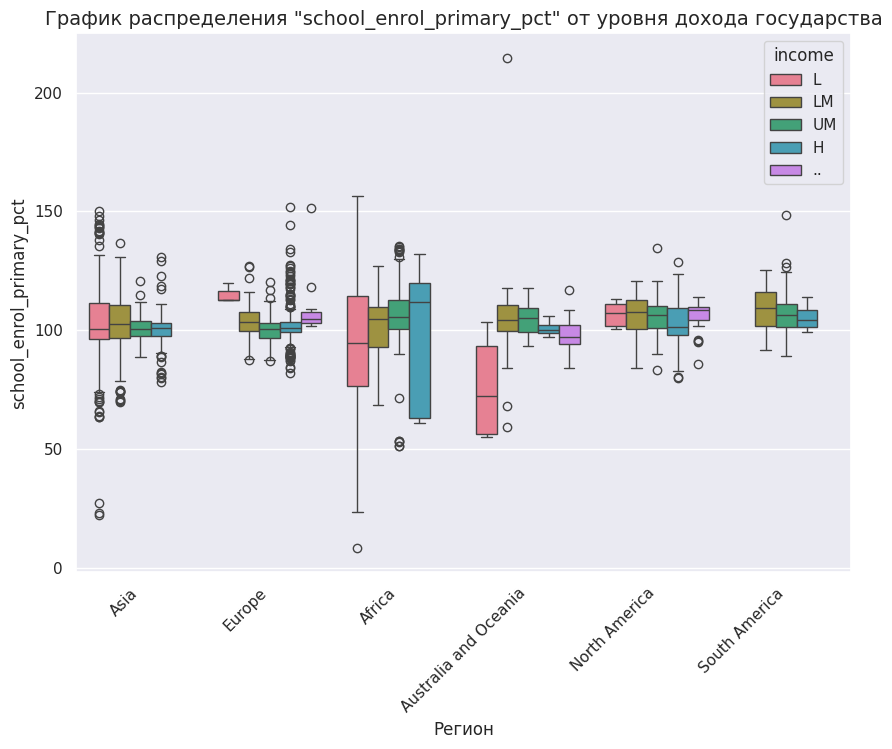

In [160]:
# Создаем график для "school_enrol_primary_pct"
data_boxplot(data, 'school_enrol_primary_pct')

*Наблюдаются различия в охвате начальным образованием от уровня дохода государства только в Африке и Австралии и Океании, в остальных регионах этот показатель не связан с уровнем дохода государства.*

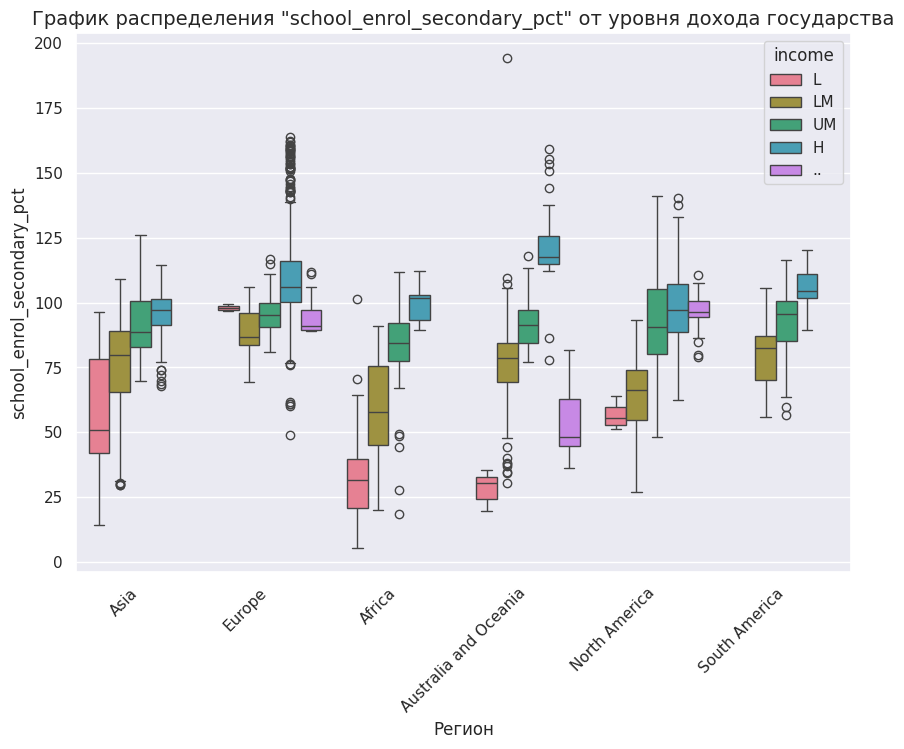

In [161]:
# Создаем график для "school_enrol_secondary_pct"
data_boxplot(data, 'school_enrol_secondary_pct')

*В показателе охвата средним образованием наблюдается сильная зависимость от уровня дохода государства, в странах с низким доходом медианное значение показателя ниже.*

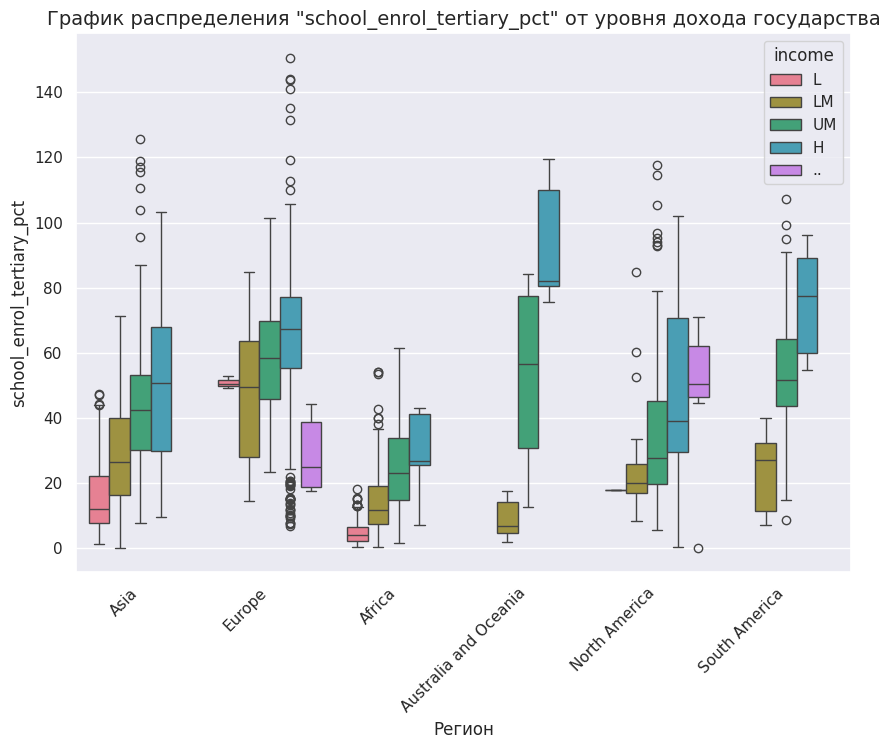

In [162]:
# Создаем график для "school_enrol_tertiary_pct"
data_boxplot(data, 'school_enrol_tertiary_pct')

*В показателе охвата высшим образованием наблюдается сильная зависимость от уровня дохода государства, в странах с низким доходом медианное значение показателя ниже.*

## 4. Сделаем общий вывод и дадим рекомендации относительно образовательных реформ и финансирования.
<a name="4"></a>

 **1. Государственные расходы на образование не имеют сильной прямой связи с образовательными показателями.**

-  Незначительная корреляция наблюдается только между расходами на образование и уровнем грамотности населения.
В странах с низкими доходами даже при увеличении расходов сохраняются проблемы с доступом и качеством образования.

**2. Есть региональные различия в уровне образования:**

- Африка имеет наиболее низкие показатели грамотности и охвата образованием, что связано с нехваткой школ, кадров и инфраструктуры.
- Европа и Северная Америка демонстрируют наивысший уровень образования, высокий процент завершения обучения и лучший доступ к учителям.
- Африка и некоторые страны Северной Америки показывают самые низкие уровни завершения начального образования.

**3.  Доступ к начальному образованию:**

- В большинстве регионов процент охвата стабильно приближается к 100%.
- В Африке наблюдаются сильные отклонения:
Критически низкие значения → свидетельствуют о проблемах с доступом (нехватка школ, экономические трудности).
Значения выше 100% → могут объясняться задержками в обучении или миграцией.

**4. Доступ к среднему образованию:**

- Для Африки показатель охвата варьируется от 10% до 75%, что говорит о значительных проблемах с доступностью обучения.
- В Европе наблюдаются значения выше 100%, что может быть связано с миграцией в престижные учебные заведения.

**5. Доступ к высшему образованию:**

- В Африке охват высшим образованием не превышает 20%.
- В Европе и Северной Америке охват часто превышает 100% из-за международной миграции студентов.
- В других регионах разброс значений составляет от 10% до 100%.

**6. Соотношение учеников и учителей:**

- В Европе число учеников на одного учителя снизилось до менее 10 в начальной школе и менее 5 в средней.
- В Африке ситуация улучшилась, но остаётся сложной:
В начальной школе число учеников уменьшилось с 40 до 30 на одного учителя.
В средней школе этот показатель снизился с 25 до 22.
- Обратная зависимость: чем меньше учеников на одного учителя, тем выше охват образованием и уровень грамотности.

**7. Влияние уровня дохода государства на образование:**

- В регионах с низким доходом уровень образования стабильно ниже, чем в странах с высоким уровнем дохода.
- Завершение начального образования зависит от дохода государства, особенно в Африке и Северной Америке.
- Охват средним и высшим образованием имеет сильную зависимость от уровня дохода: в странах с низким доходом охват значительно ниже.

**Рекомендации для образовательной политики:**
1. Увеличение финансирования образования в странах с низкими доходами, особенно в Африке. Приоритетное вложение в инфраструктуру, подготовку учителей и учебные материалы.
2. Оптимизация нагрузки на учителей. Программы по привлечению педагогов в регионы с перегруженными классами.
3. Ориентация не только на охват, но и на качество образования.
4. Развитие международного сотрудничества и поддержки. Обмен образовательными программами для сокращения разрыва между регионами.

